# <div style="text-align: center; background-color: white; font-family:Times New Roman; color: #b11226; padding: 14px; line-height: 1;border-radius:20px"> **Sip, Swirl, and Stats: Red Wine Quality in Numbers**</div>

# <div style="text-align: center; background-color: #b11226; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px"> Data Pre-Processsing</div>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Summary statistics
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Good wine quality - 7 to 8

Other wine quality - 3 to 6

In [6]:
# Checking for missing data
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# <div style="text-align: center; background-color: #b11226; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">Data Visualization and Analysis </div>

**Number of wines in each category of the quality rating**

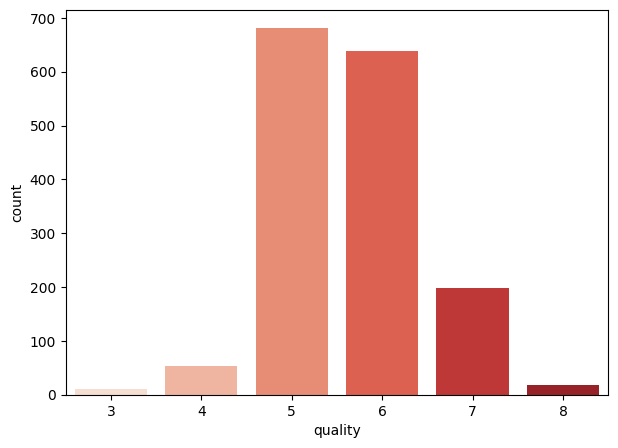

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='quality', data=df, palette='Reds');

**Insight:**
 
> * It seems that 5 and 6 rated quality wines are the most common ones.
> 

**Overall distribution of each attribute**

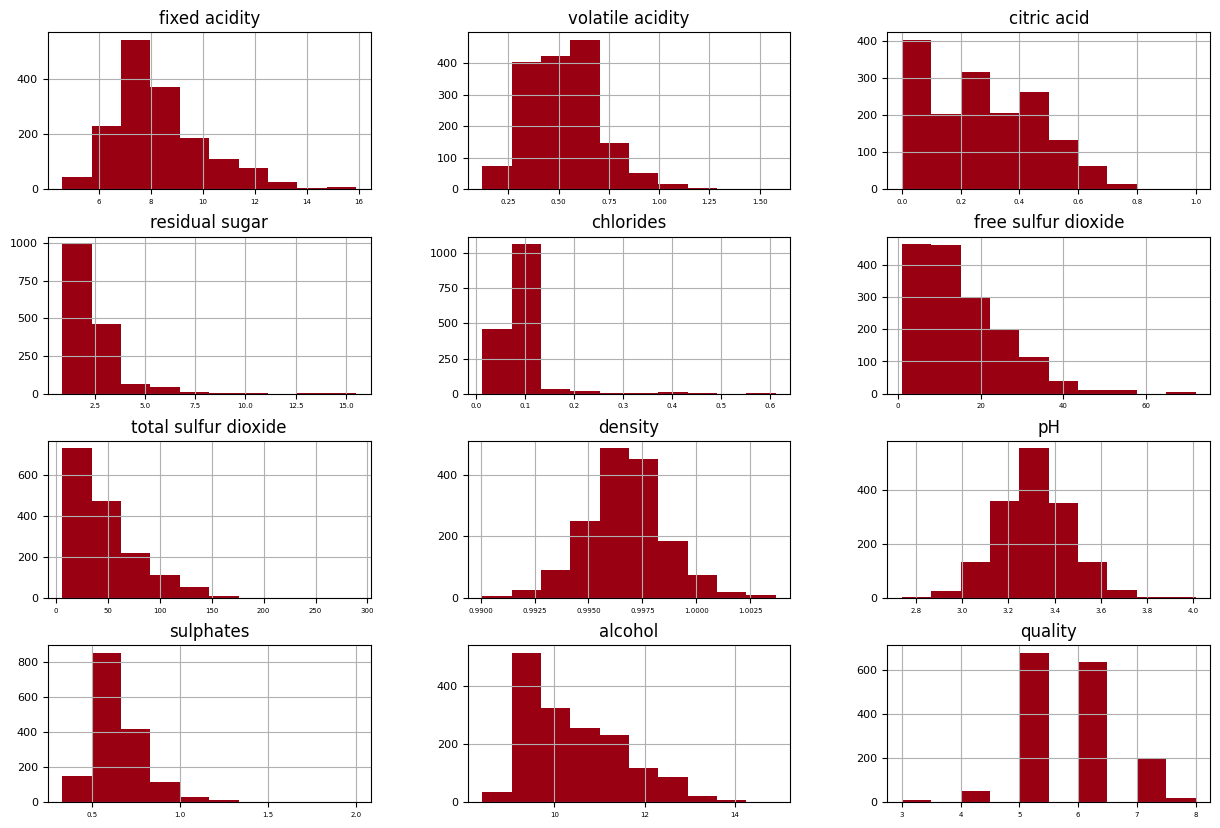

In [8]:
# Presence of outliers
df.hist(figsize=(15, 10), bins=10, xlabelsize=5, ylabelsize=8, color='#990012');

**What are the most influential features that contribute to the quality of the red wine in this dataset?**

> **Evaluating Linear Relationships between Features and Ratings using the Pearson Correlation Method**

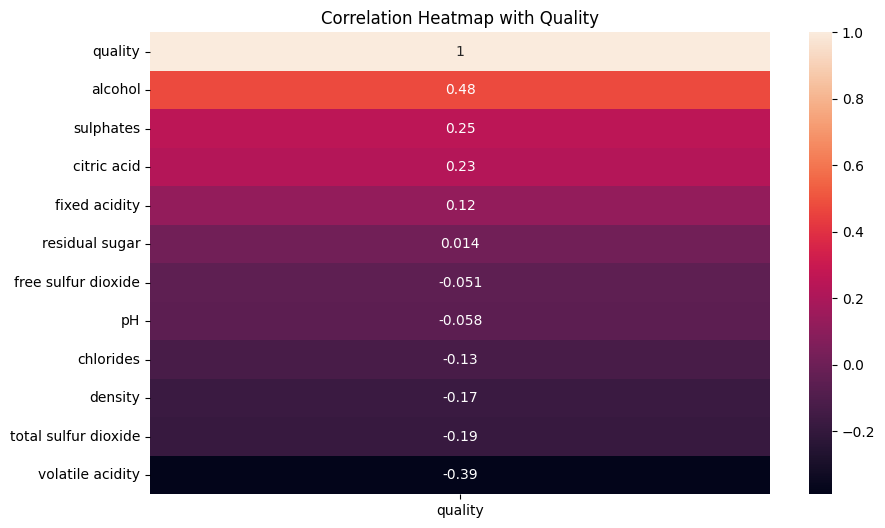

In [9]:
# Create a correlation matrix for all the columns
correlation_matrix = df.corr(method = 'pearson')

# Create a heatmap for correlation with 'rating'
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['quality']].sort_values(by='quality', ascending=False), annot=True)
plt.title("Correlation Heatmap with Quality")
plt.show()

**Insight:**
 
> * Alcohol, sulphates, citric acid, fixed acidity and residual sugar exhibit a positive linear relationship with the quality of red wine. 
> 
> * Conversely, free and total sulphur-di-oxide, pH, chlorides, density and volatile acidity display a negative linear relationship with the quality of red wine. 
> 
> * This suggests that sellers tend to favor red wine with lower sulphur-di-oxide, pH, chlorides, density and volatile acidity, while showing a preference for those alcohol, sulphates, citric acid, fixed acidity and residual sugar.

**Features which will yield the greatest influence on predicting the quality of the red wine**

> **Using the Random Forests Regressor to check for Feature Importance**

In [10]:
X = df.drop(columns=['quality'])
y = df['quality']

#Fit our model
model = RandomForestRegressor()
model.fit(X, y)

#Assign our important features for visualization
feature_importances = model.feature_importances_

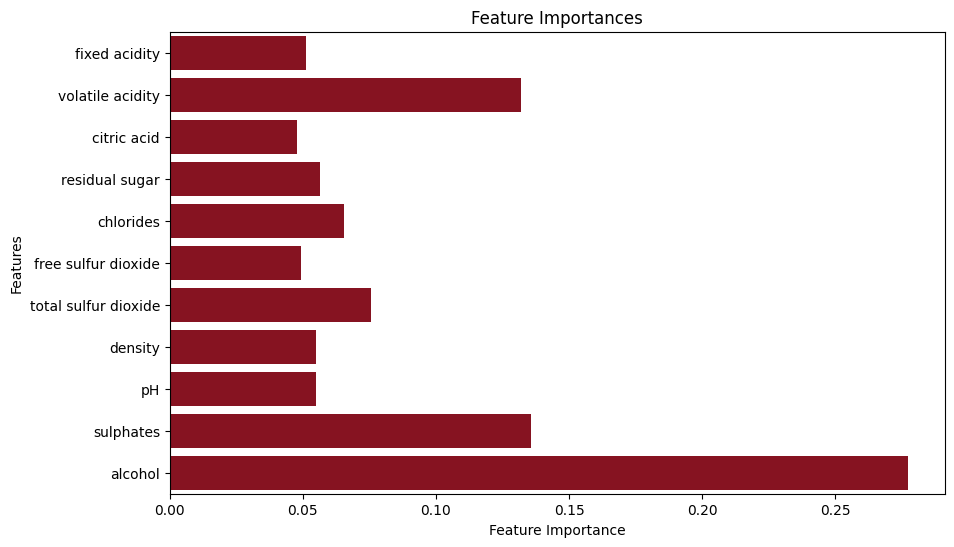

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns,  color='#990012')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

**Insight:**

> The bar chart showcases alcohol and acidity as two pivotal factors (predictor variables) contributing to the ability to forecast red wine quality (for a machine learning model).

**Alcohol Presence**

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

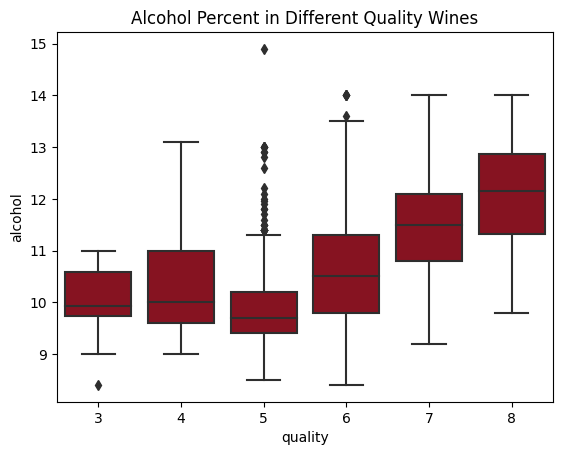

In [12]:
bp = sns.boxplot(x='quality',y='alcohol', data=df, color='#990012')
bp.set(title="Alcohol Percent in Different Quality Wines")

**Insight:**
>
> * On this boxplot we can see how wines that contain higher alcohol% get better quality ratings.
> 
> * Alcohol arises during the fermentation process when yeast converts sugar into alcohol. It contributes to the overall taste and consistency of the wine.
> 

**Sulphates Presence**

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

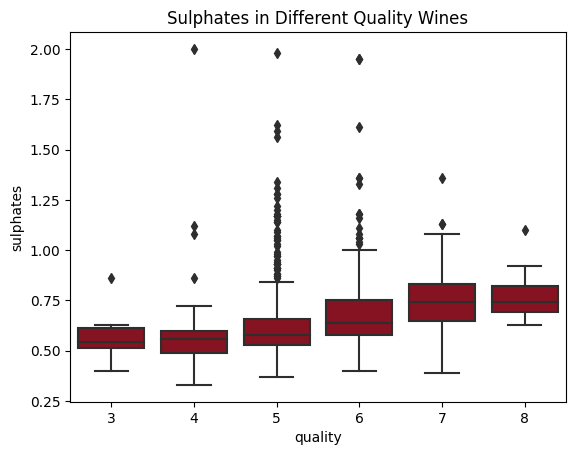

In [13]:
bp = sns.boxplot(x='quality',y='sulphates', data=df, color='#990012')
bp.set(title="Sulphates in Different Quality Wines")

**Insight:**
>
> * In the case of the sulphates, the relation between it and quality of the red wine seems to be linearly positive.
> 
> * Sulphates are added asa wine preservative and it aims to preserve the complexity of flavour in wine.
> 



**Acetic Acid Presence**

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

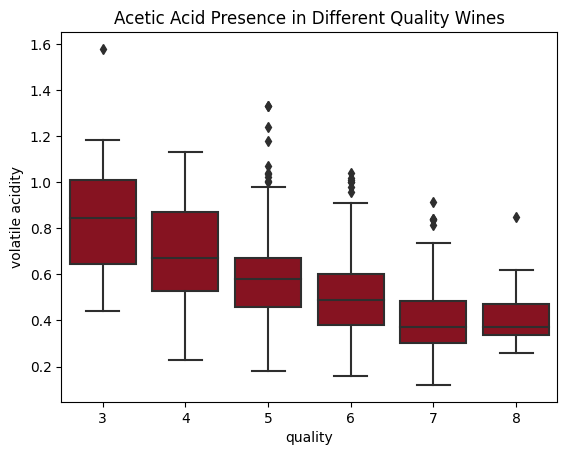

In [14]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=df, color='#990012')
bp.set(title="Acetic Acid Presence in Different Quality Wines")

**Insight:**
>
> *  In the case of volatile acidity, the relation between it and the quality of the red wine seems to be linearly negative.
> 
> * Wine develops acidity during the fermentation process and most of these acids include volatile acids, which negatively imact the taste and aroma of the wine.
>

**Separating the quality values of red wine into three different groups:**

>***Low: contains wines whose quality is 3 or 4**

>***Medium: contains wines whose quality is 5 or 6**

>***High: contains wines whose quality is 7 or 8**

In [15]:
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

<Axes: xlabel='quality', ylabel='count'>

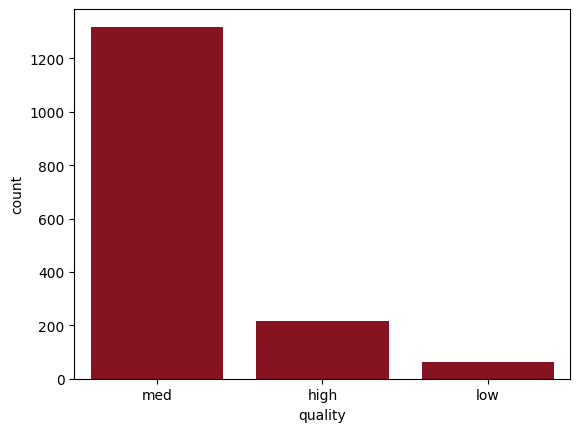

In [16]:
sns.countplot(x=df_aux['quality'],color='#990012')

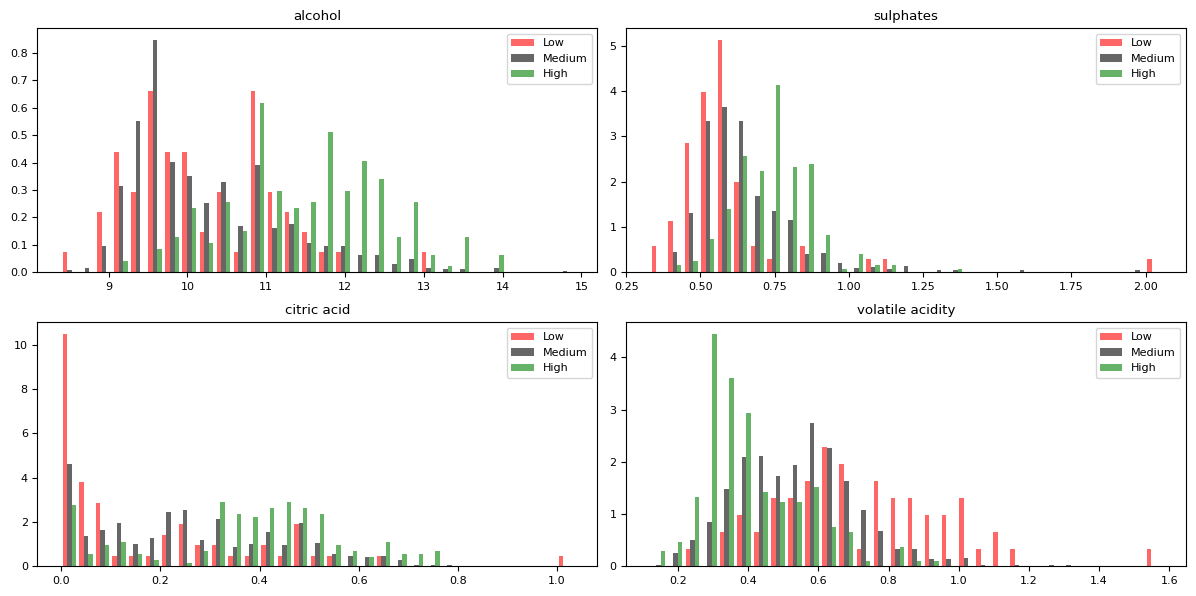

In [17]:
flistt = ['alcohol','sulphates','citric acid','volatile acidity']
low = df_aux[df_aux['quality'] == 'low']
medium = df_aux[df_aux['quality'] == 'med']
high = df_aux[df_aux['quality'] == 'high']
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 2, ncols= 2, figsize=(12,6))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    binwidth= (max(df_aux[flistt[i]]) - min(df_aux[flistt[i]]))/30
    bins = np.arange(min(df[flistt[i]]), max(df_aux[flistt[i]]) + binwidth, binwidth)
    graph.hist([low[flistt[i]],medium[flistt[i]],high[flistt[i]]], bins=bins, alpha=0.6, density=True, label=['Low','Medium','High'], color=['red','black','green'])
    graph.legend(loc='upper right')
    graph.set_title(flistt[i])
plt.tight_layout()

**Insight:**
>
> As we can see from the histograms, higher values of alcohol, sulphates and citric acid seem to belong to the higher quality red wines while higher values of volatile acids are present in lower quality red wines.
> 

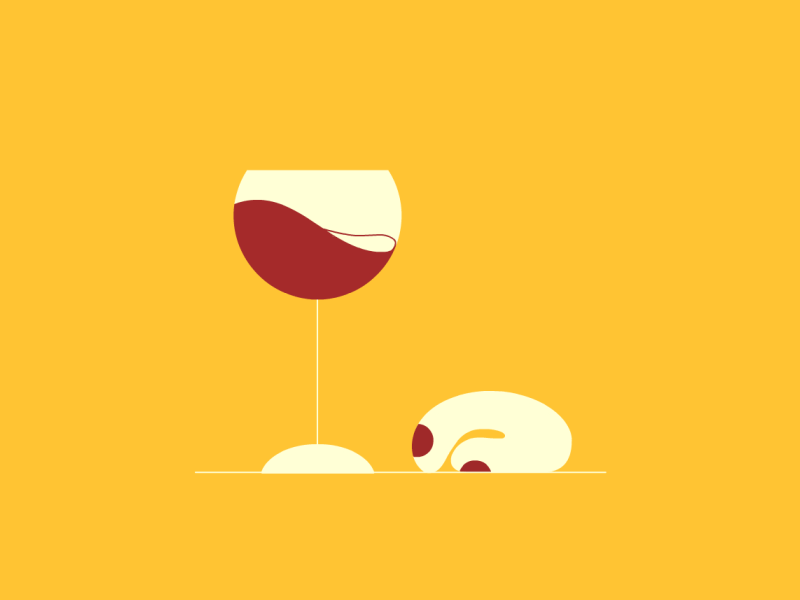